In [1]:
# Loading the denoiser network


# Limit the GPU access
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
# Loading the model
DAE = tf.saved_model.load('DAE')


In [2]:
# Simulating input data


import numpy as np
import scipy.io as io
from PIL import Image
import matplotlib.pyplot as plt
from DMSPRestore import filter_image

# Loading data
sigma_d = 255 * .01 # Additive white Gaussian noise standard deviation
downsampling_rate = 2 # Integer value indicating the downsampling rate (set 1 for no down-sampling)
kernel = np.array(Image.open('data/kernel.png'), dtype='float32')[...,0]
kernel = kernel / np.sum(kernel[:])
gt = np.array(Image.open('data/101085.jpg'), dtype='float32')
#gt = gt[1:,1:,...]

# Simulating degradations
degraded = filter_image(gt, kernel)
noise = np.random.normal(0.0, sigma_d, degraded.shape).astype(np.float32)
subsampling_mask = np.zeros(degraded.shape)
subsampling_mask[::downsampling_rate,::downsampling_rate] = 1
degraded = subsampling_mask*(degraded + noise)

# Saving images
img_degraded = Image.fromarray(np.clip(degraded, 0, 255).astype(dtype=np.uint8))
img_degraded.save("data/degraded.png","png")

img_subsampling_mask = Image.fromarray(np.clip(subsampling_mask, 0, 255).astype(dtype=np.uint8))
img_subsampling_mask.save("data/subsampling_mask.png","png")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


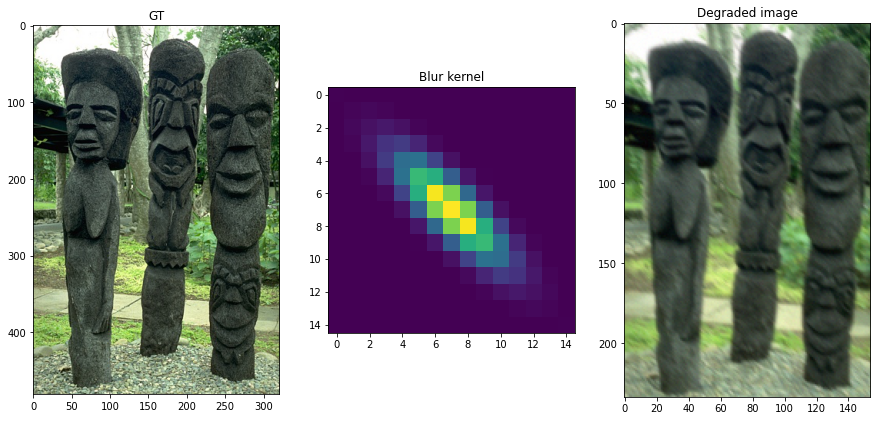

In [3]:
# Visualize degraded input image


plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gt/255)
_=plt.title('GT')
plt.subplot(132)
plt.imshow(kernel)
_=plt.title('Blur kernel')
plt.subplot(133)
plt.imshow(degraded[::downsampling_rate, ::downsampling_rate]/255)
_=plt.title('Degraded image')

In [4]:
# non-blind reconstruction demo


from DMSPRestore import DMSP_restore

# setting DMSP parameterss
params = {}
params['denoiser'] = DAE
params['sigma_dae'] = 11.0
params['num_iter'] = 300
params['mu'] = 0.9
params['alpha'] = 0.1
params['gt'] = gt # feed ground truth to monitor the PSNR at each iteration

# running DMSP
restored = DMSP_restore(degraded=degraded,
                        kernel=kernel,
                        subsampling_mask=subsampling_mask,
                        sigma_d=sigma_d,
                        params=params)
# saving results
img_restored = Image.fromarray(np.clip(restored, 0, 255).astype(dtype=np.uint8))
img_restored.save("data/restored.png","png")


Initialized with PSNR: 21.71155862074349
Running iteration: 0
PSNR is: 21.751865939515895, iteration finished in 2.217287540435791 seconds
Running iteration: 1
PSNR is: 21.82379607565413, iteration finished in 0.43901753425598145 seconds
Running iteration: 2
PSNR is: 21.915717077925436, iteration finished in 0.4396653175354004 seconds
Running iteration: 3
PSNR is: 22.016732843910262, iteration finished in 0.4395613670349121 seconds
Running iteration: 4
PSNR is: 22.11587726717104, iteration finished in 0.4387855529785156 seconds
Running iteration: 5
PSNR is: 22.20643586300217, iteration finished in 0.43839025497436523 seconds
Running iteration: 6
PSNR is: 22.28313309415794, iteration finished in 0.4386756420135498 seconds
Running iteration: 7
PSNR is: 22.346781045109164, iteration finished in 0.43903160095214844 seconds
Running iteration: 8
PSNR is: 22.39842902050414, iteration finished in 0.439622163772583 seconds
Running iteration: 9
PSNR is: 22.44162438052872, iteration finished in 0

PSNR is: 23.210035432297765, iteration finished in 0.43862485885620117 seconds
Running iteration: 83
PSNR is: 23.213236357697184, iteration finished in 0.4398629665374756 seconds
Running iteration: 84
PSNR is: 23.21607906112016, iteration finished in 0.43853330612182617 seconds
Running iteration: 85
PSNR is: 23.218908578240807, iteration finished in 0.43851351737976074 seconds
Running iteration: 86
PSNR is: 23.221553556340872, iteration finished in 0.4388904571533203 seconds
Running iteration: 87
PSNR is: 23.224575087936344, iteration finished in 0.43874192237854004 seconds
Running iteration: 88
PSNR is: 23.22754114685214, iteration finished in 0.4413752555847168 seconds
Running iteration: 89
PSNR is: 23.230132214401124, iteration finished in 0.43833422660827637 seconds
Running iteration: 90
PSNR is: 23.232824916915284, iteration finished in 0.4386312961578369 seconds
Running iteration: 91
PSNR is: 23.23533269893605, iteration finished in 0.43849873542785645 seconds
Running iteration: 

PSNR is: 23.360013401655504, iteration finished in 0.4389486312866211 seconds
Running iteration: 165
PSNR is: 23.361340229296516, iteration finished in 0.43904614448547363 seconds
Running iteration: 166
PSNR is: 23.362544785487394, iteration finished in 0.4390742778778076 seconds
Running iteration: 167
PSNR is: 23.36376577700543, iteration finished in 0.4386630058288574 seconds
Running iteration: 168
PSNR is: 23.364874961176017, iteration finished in 0.44061875343322754 seconds
Running iteration: 169
PSNR is: 23.366061820683974, iteration finished in 0.4389982223510742 seconds
Running iteration: 170
PSNR is: 23.36727086125977, iteration finished in 0.438723087310791 seconds
Running iteration: 171
PSNR is: 23.36848007015253, iteration finished in 0.4397156238555908 seconds
Running iteration: 172
PSNR is: 23.369737328042056, iteration finished in 0.43868112564086914 seconds
Running iteration: 173
PSNR is: 23.370726600978927, iteration finished in 0.4408755302429199 seconds
Running iterat

PSNR is: 23.434220590890007, iteration finished in 0.4391000270843506 seconds
Running iteration: 247
PSNR is: 23.43481779229038, iteration finished in 0.43891239166259766 seconds
Running iteration: 248
PSNR is: 23.43542371871183, iteration finished in 0.4414854049682617 seconds
Running iteration: 249
PSNR is: 23.4360499514204, iteration finished in 0.4389173984527588 seconds
Running iteration: 250
PSNR is: 23.436589377575174, iteration finished in 0.4391477108001709 seconds
Running iteration: 251
PSNR is: 23.43742318981387, iteration finished in 0.43871045112609863 seconds
Running iteration: 252
PSNR is: 23.438009994559884, iteration finished in 0.4389820098876953 seconds
Running iteration: 253
PSNR is: 23.43850803758376, iteration finished in 0.4408390522003174 seconds
Running iteration: 254
PSNR is: 23.439025414841808, iteration finished in 0.43945884704589844 seconds
Running iteration: 255
PSNR is: 23.439525446774855, iteration finished in 0.43897056579589844 seconds
Running iterati

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


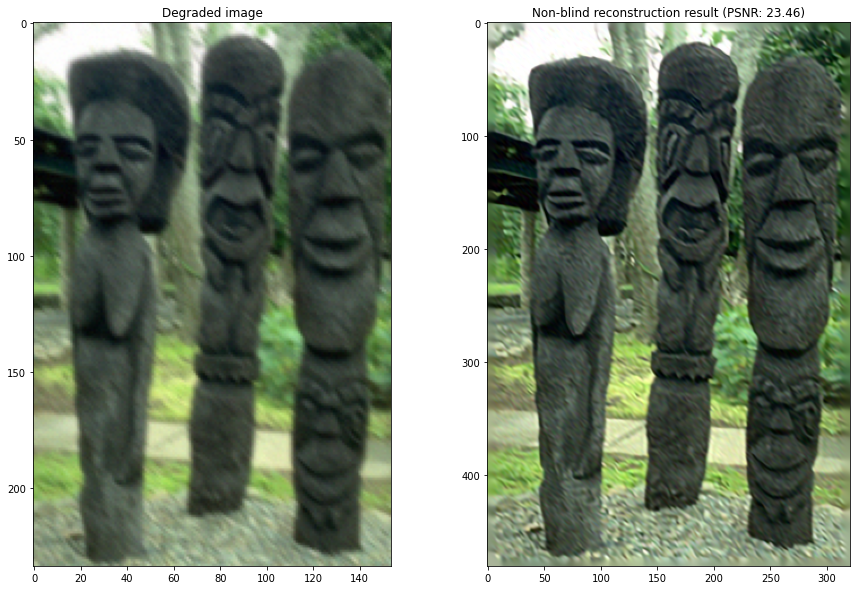

In [5]:
# Visualize non-blind result

from DMSPRestore import compute_PSNR

psnr = compute_PSNR(gt, restored, kernel.shape)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(degraded[::downsampling_rate, ::downsampling_rate]/255)
_=plt.title('Degraded image')
plt.subplot(122)
plt.imshow(restored/255)
_=plt.title('Non-blind reconstruction result (PSNR: %.2f)'%psnr)


In [6]:
# noise-blind reconstruction demo


from DMSPRestore import DMSP_restore

# setting DMSP parameterss
params = {}
params['denoiser'] = DAE
params['sigma_dae'] = 11.0
params['num_iter'] = 300
params['mu'] = 0.9
params['alpha'] = 0.1
params['gt'] = gt # feed ground truth to monitor the PSNR at each iteration

# running DMSP
restored = DMSP_restore(degraded=degraded,
                        kernel=kernel,
                        subsampling_mask=subsampling_mask,
                        sigma_d=0,
                        params=params)

# saving results
img_restored = Image.fromarray(np.clip(restored, 0, 255).astype(dtype=np.uint8))
img_restored.save("data/restored_noise_blind.png","png")


Initialized with PSNR: 21.71155862074349
Running iteration: 0
PSNR is: 21.73044036589834, iteration finished in 0.4459214210510254 seconds
Running iteration: 1
PSNR is: 21.765054934869752, iteration finished in 0.4423103332519531 seconds
Running iteration: 2
PSNR is: 21.811337154514533, iteration finished in 0.44309377670288086 seconds
Running iteration: 3
PSNR is: 21.86508464052785, iteration finished in 0.44230222702026367 seconds
Running iteration: 4
PSNR is: 21.92334909855245, iteration finished in 0.44985437393188477 seconds
Running iteration: 5
PSNR is: 21.982883691300362, iteration finished in 0.4418907165527344 seconds
Running iteration: 6
PSNR is: 22.03978108277164, iteration finished in 0.4414527416229248 seconds
Running iteration: 7
PSNR is: 22.093796315027593, iteration finished in 0.44190335273742676 seconds
Running iteration: 8
PSNR is: 22.142820710539088, iteration finished in 0.443326473236084 seconds
Running iteration: 9
PSNR is: 22.187397622930057, iteration finished 

PSNR is: 23.238362801436327, iteration finished in 0.44254159927368164 seconds
Running iteration: 83
PSNR is: 23.241943136192976, iteration finished in 0.4432098865509033 seconds
Running iteration: 84
PSNR is: 23.245467362445655, iteration finished in 0.44239163398742676 seconds
Running iteration: 85
PSNR is: 23.24903079510164, iteration finished in 0.4421195983886719 seconds
Running iteration: 86
PSNR is: 23.252814883667323, iteration finished in 0.44249415397644043 seconds
Running iteration: 87
PSNR is: 23.255944661594185, iteration finished in 0.4417104721069336 seconds
Running iteration: 88
PSNR is: 23.258953600029496, iteration finished in 0.4435887336730957 seconds
Running iteration: 89
PSNR is: 23.262128153098516, iteration finished in 0.4419727325439453 seconds
Running iteration: 90
PSNR is: 23.265371045205, iteration finished in 0.4423184394836426 seconds
Running iteration: 91
PSNR is: 23.268768487922486, iteration finished in 0.44198036193847656 seconds
Running iteration: 92


PSNR is: 23.388343597623745, iteration finished in 0.44195079803466797 seconds
Running iteration: 165
PSNR is: 23.388641100055647, iteration finished in 0.4416937828063965 seconds
Running iteration: 166
PSNR is: 23.389329233431965, iteration finished in 0.44211602210998535 seconds
Running iteration: 167
PSNR is: 23.39049064213418, iteration finished in 0.44173574447631836 seconds
Running iteration: 168
PSNR is: 23.390745020969415, iteration finished in 0.44353246688842773 seconds
Running iteration: 169
PSNR is: 23.391605164590743, iteration finished in 0.44177889823913574 seconds
Running iteration: 170
PSNR is: 23.392350179242143, iteration finished in 0.4408547878265381 seconds
Running iteration: 171
PSNR is: 23.392929145833698, iteration finished in 0.4421393871307373 seconds
Running iteration: 172
PSNR is: 23.3940276561837, iteration finished in 0.44353461265563965 seconds
Running iteration: 173
PSNR is: 23.394768076761462, iteration finished in 0.4425666332244873 seconds
Running it

PSNR is: 23.429800262010055, iteration finished in 0.4428706169128418 seconds
Running iteration: 246
PSNR is: 23.430367265488368, iteration finished in 0.4420597553253174 seconds
Running iteration: 247
PSNR is: 23.43058906263417, iteration finished in 0.4429469108581543 seconds
Running iteration: 248
PSNR is: 23.430952629336808, iteration finished in 0.44257307052612305 seconds
Running iteration: 249
PSNR is: 23.431664376911215, iteration finished in 0.44123196601867676 seconds
Running iteration: 250
PSNR is: 23.431626762774876, iteration finished in 0.4415581226348877 seconds
Running iteration: 251
PSNR is: 23.431664376911215, iteration finished in 0.44215989112854004 seconds
Running iteration: 252
PSNR is: 23.432222821326995, iteration finished in 0.4433317184448242 seconds
Running iteration: 253
PSNR is: 23.432243076462413, iteration finished in 0.4421346187591553 seconds
Running iteration: 254
PSNR is: 23.43210707860214, iteration finished in 0.44143104553222656 seconds
Running ite

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


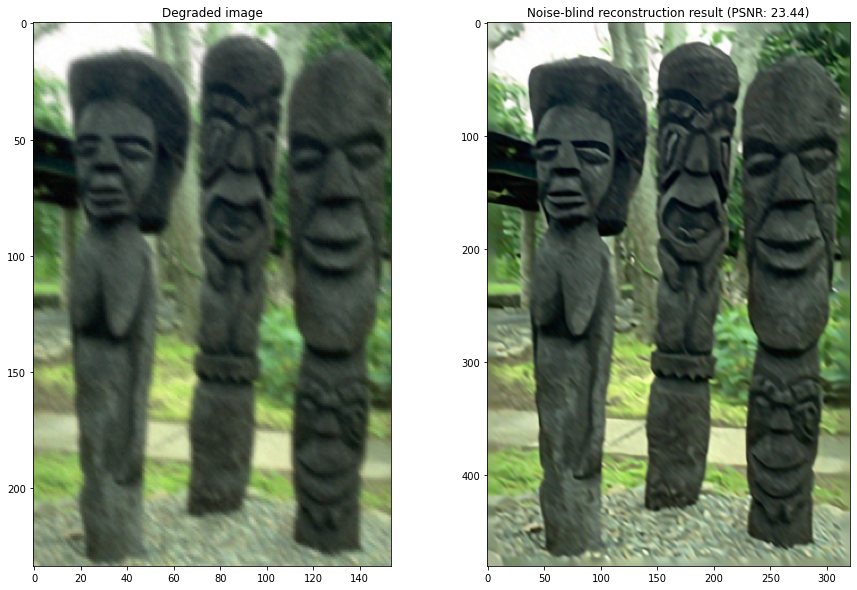

In [7]:
# Visualize noise-blind result


from DMSPRestore import compute_PSNR

psnr = compute_PSNR(gt, restored, kernel.shape)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(degraded[::downsampling_rate, ::downsampling_rate]/255)
_=plt.title('Degraded image')
plt.subplot(122)
plt.imshow(restored/255)
_=plt.title('Noise-blind reconstruction result (PSNR: %.2f)'%psnr)